# BLU02 - Learning Notebook - Part 2 of 3 - Combining dataframes

In the first notebook, we extracted information for different groups or classes from one table. Here we learn to access information distributed in different tables.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import os

## 1. Combining dataframes in Pandas

Our dataset is distributed in 4 kinds of tables - `Programs`, `Concerts`, `Works`, `Soloists` (check out the dataset description in the README if you don't remember). Sometimes the questions we ask require information from different tables. 

For example, how many different programs does the NYP typically present per season?

The information about programs is in `/data/programs/` which contains one file per Season. How do we access all this information?

### 1.1 Concatenate

One option is to integrate or concatenate all season tables into one dataframe containing all seasons.

Concatenation means to unite multiple dataframes (or series) in one. 

Let's explore concatenation with the first two seasons:

In [2]:
season_0 = pd.read_csv('./data/programs/1842-43.csv')
season_1 = pd.read_csv('./data/programs/1843-44.csv')

In [3]:
season_0

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43


In [4]:
season_1

,GUID,ProgramID,Orchestra,Season
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


The [pd.concat()](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) function performs concatenation operations along an axis (`axis=0` for index and `axis=1` for columns).

Concatenation along axis 1, columns, looks like this. The dataframes to concatenate are supplied as a list:

In [5]:
seasons = [season_0, season_1]
pd.concat(seasons, axis=1)

,GUID,ProgramID,Orchestra,Season,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


This does not make sense in our situation, as we no longer have a single observation per row.

We want to concatenate along axis 0, the index.

In [6]:
pd.concat(seasons, axis=0)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
0,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
1,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
2,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
3,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


This dataframe looks better, but there's something weird with the index: it's not unique anymore.

Different observations share the same index. Not cool.

For dataframes that don't have a meaningful index, you may wish to ignore the index:

In [7]:
pd.concat(seasons, axis=0, ignore_index=True)

,GUID,ProgramID,Orchestra,Season
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
5,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
6,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
7,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


Now, let's try something different. 

Let's try to change some of the column names in `season_0` and see what happens in concatenation.

In [8]:
season_0_ = season_0.copy()
season_0_.columns = [0, 1, 2, 'Season']
print(f'season_0_ columns:\n {season_0_.columns.to_numpy()}')
print(f'season_1 columns:\n {season_1.columns.to_numpy()}')

season_0_ columns:
 [0 1 2 'Season']
season_1 columns:
 ['GUID' 'ProgramID' 'Orchestra' 'Season']


So we have one column name shared between the two dataframes and the other names are different. Now we concatenate them:

In [9]:
seasons_ = [season_0_, season_1]
pd.concat(seasons_, axis=0)

,0,1,2,Season,GUID,ProgramID,Orchestra
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853.0,New York Philharmonic,1842-43,NaN,NaN,NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178.0,New York Philharmonic,1842-43,NaN,NaN,NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785.0,Musicians from the New York Philharmonic,1842-43,NaN,NaN,NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887.0,New York Philharmonic,1842-43,NaN,NaN,NaN
0,NaN,NaN,NaN,1843-44,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305.0,New York Philharmonic
1,NaN,NaN,NaN,1843-44,47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368.0,New York Philharmonic
2,NaN,NaN,NaN,1843-44,5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226.0,New York Philharmonic
3,NaN,NaN,NaN,1843-44,7550f75e-5c0c-4519-9196-05a6c4e2612c,5087.0,New York Philharmonic


What a mess! What did we learn?

* When the dataframes have different columns, `pd.concat()` will take the union of all dataframes by default (no information loss)
* Concatenation will fill columns that are not present for specific dataframes with `np.NaN` (missing values).

The good news is that you can choose how you want to glue the dataframes in regards to the other axis, the one not being concatenated. 

It is controlled by `join` parameter which is `outer` by default, meaning a union. Setting `join='inner'` will take the intersection, i.e., the columns that are present in all dataframes.

In [10]:
pd.concat(seasons_, axis=0, join='inner')

,Season
0,1842-43
1,1842-43
2,1842-43
3,1842-43
0,1843-44
1,1843-44
2,1843-44
3,1843-44


Before we move on, let's go back to the index. We dropped the index because it was repeated. However, the season tables do have a unique identifier, the `GUID`. Let's use this column as index in the seasons dataframes and repeat the concatenation.

In [11]:
season_0_indexed = pd.read_csv('./data/programs/1842-43.csv', index_col='GUID')
season_1_indexed = pd.read_csv('./data/programs/1843-44.csv', index_col='GUID')
pd.concat([season_0_indexed, season_1_indexed])

,ProgramID,Orchestra,Season
GUID,,,
38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,New York Philharmonic,1842-43
c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,New York Philharmonic,1842-43
894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,Musicians from the New York Philharmonic,1842-43
34ec2c2b-3297-4716-9831-b538310462b7,5887,New York Philharmonic,1842-43
610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,New York Philharmonic,1843-44
47b6e9e8-3b18-49ea-ae2a-b9b0ca18902c,3368,New York Philharmonic,1843-44
5e533e4f-d4ac-4aaa-b8d2-e189f6806655,4226,New York Philharmonic,1843-44
7550f75e-5c0c-4519-9196-05a6c4e2612c,5087,New York Philharmonic,1843-44


There you go. Concatenation complete.

Let's use `pd.concat` to combine all seasons into an enourmous dataframe. A simple approach would be to iterate over all files and concatenate all of them into a single dataframe.

In [12]:
# prepare a helper function and the file list

def read_season(file):
    path = os.path.join('.', 'data', 'programs', file)
    return pd.read_csv(path, index_col='GUID')

files = os.listdir('./data/programs/')
files = [f for f in files if '.csv' in f]

Now do the concatenation and see how long it takes, it's a large number of files in the end.

In [13]:
%%timeit

programs = pd.DataFrame()
for file in files:
    season = read_season(file)
    programs = pd.concat([programs, season])

420 ms ± 43.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It is worth noting that `pd.concat()` makes a full copy of the data, and continually reusing this function can significantly affect the performance.

It's better to use a list comprehension for concatenating more than two dataframes.

This way, you only call `pd.concat()` once.

In [14]:
%%timeit

seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons)

296 ms ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It still takes some time, but a bit less than before.

In [15]:
seasons = [read_season(f) for f in files if '.csv' in f]
programs = pd.concat(seasons)

Now that we have the final `programs` dataframe, we can see how the number of programs changes over time.

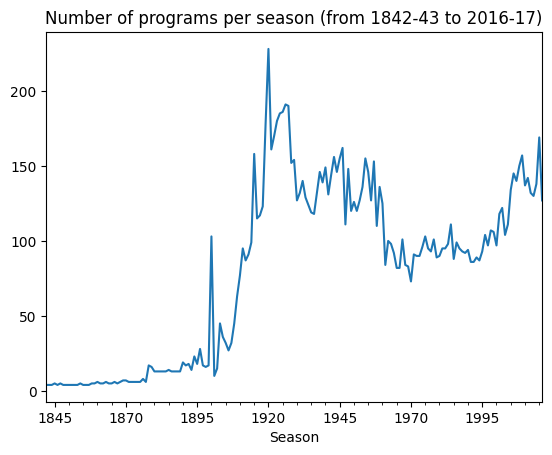

In [16]:
programs['Season'] = pd.to_datetime(programs['Season'].str[:4])

(programs.groupby('Season')
         .size()
         .plot(legend=False, use_index=True,
               title='Number of programs per season (from 1842-43 to 2016-17)'));

The NYP appears to be investing in increasing the number of distinct programs per season again since '95. 

### 1.2 Merge

Now that we have the data about programs per season, we want to know how many concerts there are every season.

Let's recall from the dataset description:
* A Program is associated with an Orchestra (e.g., New York Philharmonic) and a Season (e.g., 1842-43)
* A Program may have multiple Concerts with different dates, times and locations.

Clearly, the connection between the concerts and seasons is the program. 

Again, the information we need is spread in different tables, `concerts` and `programs`. 

We already have the `programs` dataframe with the programs for all seasons:

In [17]:
programs.head()

,ProgramID,Orchestra,Season
GUID,,,
957c8125-0bc0-4c6b-8510-af0150aa8147,781,New York Philharmonic,1941-01-01
1cedbe4e-a991-418e-b706-e005a7ee5a31,2533,New York Philharmonic,1941-01-01
bfdee7a3-d1fb-4a88-8617-dbefeffd6843,790,New York Philharmonic,1941-01-01
7cdfeccf-624d-4f6e-974a-d3666ca6e495,2539,New York Philharmonic,1941-01-01
ecefa04b-70e2-412f-aad2-82c79026f0db,800,New York Philharmonic,1941-01-01


And we need to import the `concerts.csv` data:

In [18]:
concerts = pd.read_csv('./data/concerts.csv')
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


We have the `ProgramID` and `GUID` in both tables which helps us connect the information in them. Both of them are unique identifiers of a program. 

We just need to find the right pandas method.

Pandas provides high-performance join operations, very similar to SQL.

The method `merge()` which exists in two variants [pd.DataFrame.merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) and [pd.merge](https://pandas.pydata.org/docs/reference/api/pandas.merge.html) provides an interface for all database-like join methods.

We can call `pd.merge()` to join both tables on `GUID` or `ProgramID`. Since in our situation they are interchangeable, we will drop the latter and use the former for the merge.

In [19]:
programs = programs.drop(columns='ProgramID')

df = pd.merge(programs, concerts, on='GUID')
df.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-09T05:00:00+00:00,8:45PM
1,957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781,1,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-10T05:00:00+00:00,2:30PM
2,1cedbe4e-a991-418e-b706-e005a7ee5a31,New York Philharmonic,1941-01-01,2533,0,Student Concert,"Manhattan, NY",Carnegie Hall,1941-10-11T05:00:00+00:00,8:45PM
3,1cedbe4e-a991-418e-b706-e005a7ee5a31,New York Philharmonic,1941-01-01,2533,1,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-12T05:00:00+00:00,3:00PM
4,bfdee7a3-d1fb-4a88-8617-dbefeffd6843,New York Philharmonic,1941-01-01,790,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-16T05:00:00+00:00,8:45PM


Or, alternatively, we can call `merge()` directly on the dataframe.

In [20]:
df_ = programs.merge(concerts, on='GUID')
df_.head()

,GUID,Orchestra,Season,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-09T05:00:00+00:00,8:45PM
1,957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781,1,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-10T05:00:00+00:00,2:30PM
2,1cedbe4e-a991-418e-b706-e005a7ee5a31,New York Philharmonic,1941-01-01,2533,0,Student Concert,"Manhattan, NY",Carnegie Hall,1941-10-11T05:00:00+00:00,8:45PM
3,1cedbe4e-a991-418e-b706-e005a7ee5a31,New York Philharmonic,1941-01-01,2533,1,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-12T05:00:00+00:00,3:00PM
4,bfdee7a3-d1fb-4a88-8617-dbefeffd6843,New York Philharmonic,1941-01-01,790,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1941-10-16T05:00:00+00:00,8:45PM


The critical parameter here is the `how` which defaults to `inner` (for inner-join).

But, in fact, you can use any join, just like in SQL: `left`, `right`, `outer`, and `inner`.

![](./media/types_of_joins.jpg)

This is how pandas merge and SQL join relate:

| Pandas                                         | SQL              | What it does                              |
| ---------------------------------------------- | ---------------- | ----------------------------------------- |
| `pd.merge(right, left, on='key', how='left')`  | LEFT OUTER JOIN  | Use all keys from left frame only         |
| `pd.merge(right, left, on='key', how='right')` | RIGHT OUTER JOIN | Use all keys from right frame only        |
| `pd.merge(right, left, on='key', how='outer')` | FULL OUTER JOIN  | Use union of keys from both frames        |
| `pd.merge(right, left, on='key', how='inner')` | INNER JOIN       | Use intersection of keys from both frames |

You can find an SQL-pandas comparison also in the [user guide](ted/comparison/comparison_with_sql.html#join).

In our `concerts` and `programs` merge, we have:
* A **one-to-many** relationship - merging a unique index (program) to one or more columns where values are not unique (many concerts)
* Since every single show in `concerts` has a match in `programs`, the type of join we use doesn't matter.

Other types of relationships between the tables to merge can be
* **one-to-one** - merging on unique indexes
* **many-to-many** - merging on columns with non-uniques values. Note that in this case, the index will be discarded.

We can use the `validate` argument to automatically check whether there are unexpected duplicates in the merge keys and check their uniqueness.

In [21]:
df__ = pd.merge(programs, concerts, on='GUID', how='outer', validate="one_to_many")
assert(concerts.shape[0] == df_.shape[0] == df__.shape[0])

As you can see, both merges result in the same dataframe.

Back to our question, how is the number of concerts per season evolving?

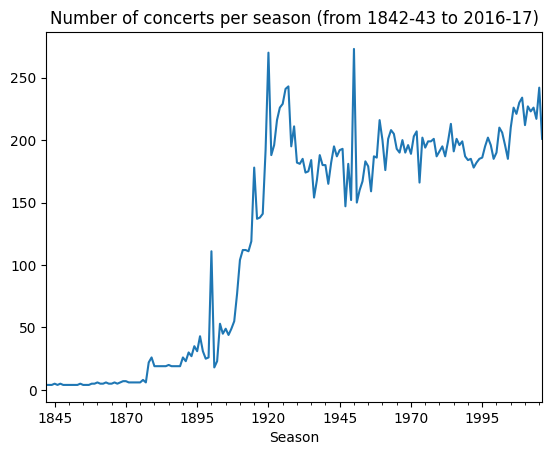

In [22]:
(programs.merge(concerts, on='GUID')
         .groupby('Season')
         .size()
         .plot(legend=False, use_index=True,
               title='Number of concerts per season (from 1842-43 to 2016-17)'));

Likewise, the number of concerts seems to be trending upwards since about 1995.

### 1.3 Join

Pandas has another dataframe merging method, [pd.DataFrame.join()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join). In contrast to `merge()`, the `how` argument defaults to `left`. The philosophy is slightly different here - we are merging another dataframe to our dataframe, instead of merging two dataframes.

`Join()` merges the dataframes on indexes. You can specify another column to merge with the `on` argument, but only for the left dataframe.

We'll use it to find the 3 composers with the most played works.

Without surprise, we start by importing `works.csv`. Because we will perform the `join()` on the `GUID` column, we set it as index.

In [23]:
works = pd.read_csv('./data/works.csv', index_col='GUID')
works.head()

,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
GUID,,,,,,,,,
38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN,False
c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN,False
894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN,False
34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN,False
610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN,False


Now we need to join `works` and `programs` to associate the composers to the programs. Each program typically contains works from more than one composer, so we expect the resulting dataframe to grow.

You can see all the composers for the first program in this preview. Notice that we don't need to speficy the `on` argument because we are merging on indexes which is the default behavior.

In [24]:
(programs.join(works)
         .head(n=7))

# equivalent to
# pd.merge(programs, works, left_on='GUID', right_index=True,
#          how='left').head(n=3)

,Orchestra,Season,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval,isInterval
GUID,,,,,,,,,,,
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,51550.0,NaN,"Bach, Johann Sebastian","TOCCATA & FUGUE, D MINOR, BWV 565 (ARR. Stokow...",NaN,"Stokowski, Leopold",NaN,False
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,8870.0,NaN,"Bach, Johann Sebastian","SONATA, VIOLIN, NO. 2, A MINOR, BWV 1003: ANDA...",NaN,"Stokowski, Leopold",NaN,False
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,52446.0,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Stokowski, Leopold",NaN,False
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,0.0,NaN,NaN,NaN,NaN,NaN,Intermission,True
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,4474.0,NaN,"Cowell, Henry Dixon",TALES OF OUR COUNTRYSIDE,NaN,"Stokowski, Leopold",NaN,False
957c8125-0bc0-4c6b-8510-af0150aa8147,New York Philharmonic,1941-01-01,781.0,9004.0,14.0,"Wagner, Richard","TRISTAN UND ISOLDE, WWV 90",Prelude and Liebestod (with or without soloist),"Stokowski, Leopold",NaN,False
1cedbe4e-a991-418e-b706-e005a7ee5a31,New York Philharmonic,1941-01-01,2533.0,8870.0,NaN,"Bach, Johann Sebastian","SONATA, VIOLIN, NO. 2, A MINOR, BWV 1003: ANDA...",NaN,"Stokowski, Leopold",NaN,False


Now for our goal: what are the top-3 composers?

In [25]:
(programs.join(works, on='GUID')
         .groupby('ComposerName')
         .size()
         .nlargest(n=3))

ComposerName
Wagner,  Richard               4923
Beethoven,  Ludwig  van        4534
Tchaikovsky,  Pyotr  Ilyich    3700
dtype: int64

Wagner wins!

What about the top-3 works?

In [26]:
(programs.join(works, on='GUID')
         .groupby(['ComposerName', 'WorkTitle'])
         .size()
         .nlargest(n=3))

ComposerName      WorkTitle                        
Wagner,  Richard  MEISTERSINGER, DIE, WWV 96           784
                  TANNHAUSER, WWV 70                   599
                  GOTTERDAMMERUNG [GÖTTERDÄMMERUNG]    592
dtype: int64

Wagner wins again!